In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sb

In [187]:
df = pd.read_csv("dataset/TC-dataset.csv", sep="\t",index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BasketID         471910 non-null  object 
 1   BasketDate       471910 non-null  object 
 2   Sale             471910 non-null  float64
 3   CustomerID       406830 non-null  float64
 4   CustomerCountry  471910 non-null  object 
 5   ProdID           471910 non-null  object 
 6   ProdDescr        471157 non-null  object 
 7   Qta              471910 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 32.4+ MB


In [4]:
print(df.CustomerCountry.unique())

['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Austria' 'Israel' 'Finland' 'Bahrain' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


In [7]:
#Numero di righe con country Unspecified
print(len(df[df["CustomerCountry"].str.contains("Unspecified")]))

#Numero di righe con country European Community
print(len(df[df["CustomerCountry"].str.contains("European Community")]))

340
61


In [8]:
#Numero di righe con CustomerCountry Unspecified e CustomerID null
print(len(df[(df["CustomerCountry"].str.contains("Unspecified")) & (df["CustomerID"].isnull())]))

96


## Analisi degli Unspecified

In [14]:
count = 0

#Numero di carrelli il cui CustomerCountry risulta unspecified
print(len(df[df["CustomerCountry"].str.contains("Unspecified")].BasketID.unique()))

print()
'''for elem in df[df["CustomerCountry"].str.contains("Unspecified") == False].iterrows():
    for item in df[df["CustomerCountry"].str.contains("Unspecified")].iterrows():
        if(elem[1].BasketID == item[1].BasketID):
            count += 1'''

'''for item in df[df["CustomerCountry"].str.contains("Unspecified")].BasketID.unique().iterrows():
     print(item[1])'''
                
#CustomerID che contengono una nazionalità unspecified
print(df[df["CustomerCountry"].str.contains("Unspecified")].CustomerID.unique())
print(len(df[df["CustomerCountry"].str.contains("Unspecified")].CustomerID.unique()))

print()

#Provo a vedere se tutti i record con quegli specifici CustomerID hanno la nazione per poterla recuperare
print(df[(df["CustomerID"].astype(str).str.contains('12743')) & (~df["CustomerCountry"].str.contains("Unspecified"))])

print()

#Record con Country Unspecified che non hanno il customer id a null raggruppati per numero di carrello
result = df[(df["CustomerCountry"].str.contains("Unspecified")) & (df["CustomerID"].notnull())]
result = result.groupby("BasketID").sum()
print(result)
print("Numero Elementi:" + str(len(result)))

print()

#Record con Country Unspecified che hanno il customer id a null raggruppati per numero di carrello
result = df[(df["CustomerCountry"].str.contains("Unspecified")) & (df["CustomerID"].isnull())]
result = result.groupby("BasketID").sum()
print(result)
print("Numero Elementi:" + str(len(result)))


print()
print(df['CustomerCountry'].mode()[0])



13

[12363. 16320.    nan 14265. 12743.]
5

Empty DataFrame
Columns: [BasketID, BasketDate, Sale, CustomerID, CustomerCountry, ProdID, ProdDescr, Qta]
Index: []

            Sale  CustomerID  Qta
BasketID                         
549687     36.50    197808.0  282
552695     96.81    767040.0  654
557499     42.10    146880.0   78
559929     51.91    213975.0  271
561658    283.06   1057669.0  205
561661    124.11    649893.0  114
563947     16.67     86541.0  126
564051    129.84    228240.0   59
Numero Elementi:8

           Sale  CustomerID  Qta
BasketID                        
553857    27.17         0.0   95
559521    58.56         0.0  207
565303    46.57         0.0  157
576646    27.80         0.0   88
578539    27.59         0.0  176
Numero Elementi:5

United Kingdom


## Ulteriori considerazioni
Ci sono solo 4 customer con country unspecified e in totale hanno 244 record
Poi ci sono dei customerID null che hanno country unspecified e hanno 96 record

Dei 4 customer country ho controllato se fosse possibile recupere il Country in uno dei loro record, ma sono tutti Unspecified

Calcolando la moda dei dati è risultato che sia United Kingdom

Decisione: trasformare i 340 Unspecified in United Kingdom

<AxesSubplot:>

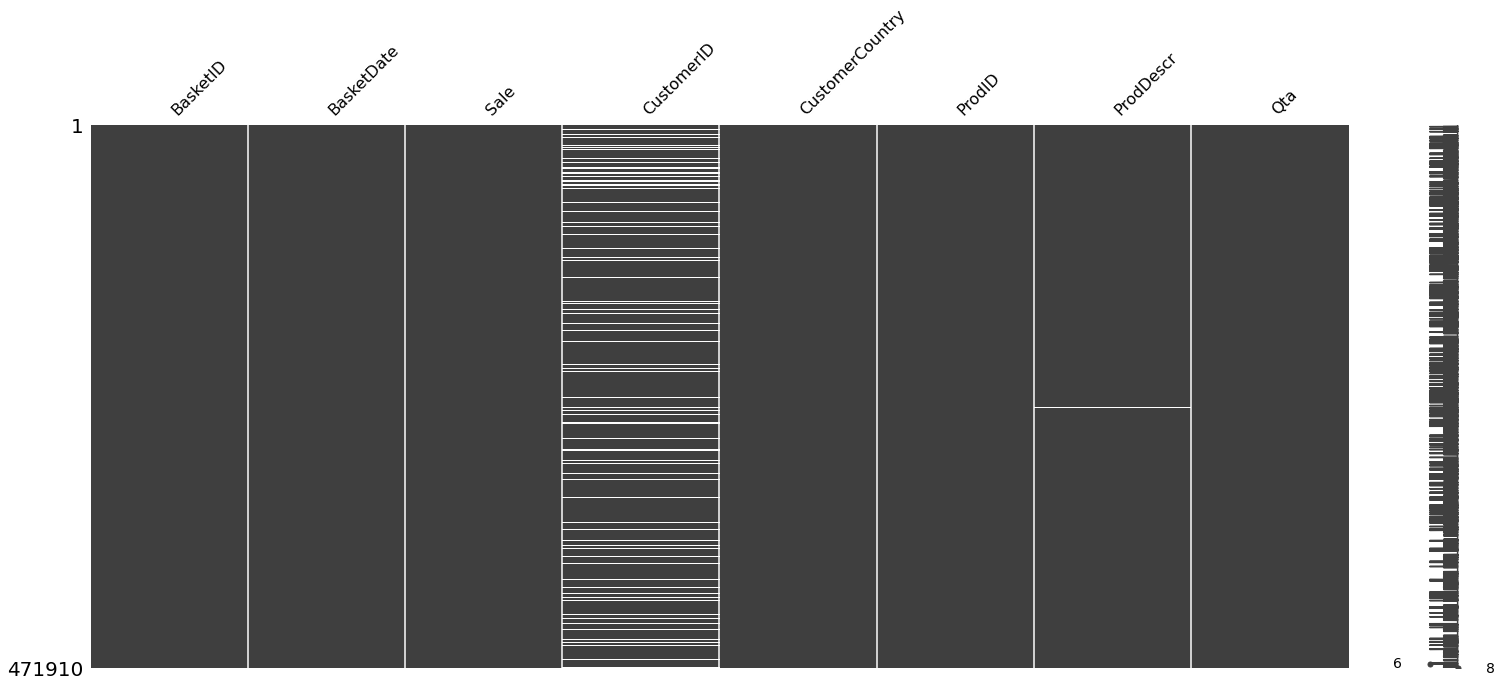

In [7]:
msno.matrix(df)

# Analisi missing value con Missingno

# Trattamento Outliers
Vedi file .docx su teams

# Grafico n° acquisti per giorno della settimana 

      BasketID  BasketDate   Sale CustomerCountry  ProdID  \
0       536365  2010-11-30   2.55  United Kingdom  85123A   
1       536365  2010-11-30   3.39  United Kingdom   71053   
2       536365  2010-11-30   2.75  United Kingdom  84406B   
3       536365  2010-11-30   3.39  United Kingdom  84029G   
4       536365  2010-11-30   3.39  United Kingdom  84029E   
...        ...         ...    ...             ...     ...   
42471   539991  2010-12-22   4.95  United Kingdom   22649   
42474   539991  2010-12-22  19.95  United Kingdom   22802   
42475   539991  2010-12-22   1.25  United Kingdom   21616   
42476   539991  2010-12-22   1.25  United Kingdom   21618   
42479   539992  2010-12-22   1.25  United Kingdom   22258   

                                 ProdDescr  Qta GiornoSettimana  
0       WHITE HANGING HEART T-LIGHT HOLDER    6         Tuesday  
1                      WHITE METAL LANTERN    6         Tuesday  
2           CREAM CUPID HEARTS COAT HANGER    8         Tuesday  
3  

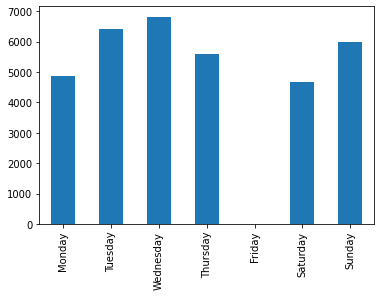

In [17]:
temp["BasketDate"] = pd.to_datetime(temp['BasketDate']).dt.date
temp["GiornoSettimana"] = pd.to_datetime(temp['BasketDate']).dt.day_name()
print(temp)
print(temp.groupby('GiornoSettimana').count())
DAYS = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
temp.GiornoSettimana.value_counts().reindex(DAYS, fill_value=0).plot.bar()
print(len(df[df["BasketDate"].isnull()]))

In [60]:
#Numero di ordini con Sale = 0

print(len((df[df["Sale"]==0])))
print(len(df[(df["Sale"]==0) &(df["Qta"]==0)]))
print(len(df[(df["Sale"]==0) &(df["Qta"]>0)])) #Quantità positiva
print(len(df[(df["Sale"]==0) &(df["Qta"]>0) & (df["CustomerID"].isnull())])) ##Customer null
print("Ordini cancellati:" + str(len(df[(df["Qta"]>0) & (df["BasketID"].str.contains("C")==False)]) & (df["Sale"]==0)))
print()
print((df[df["Sale"]==0]).tail())






#Numero di ordini con Sale < 0
print(len((df[df["Sale"]==0])))
print()
print((df[df["Sale"]<0]))
#print(len(df[(df["Sale"]==0) &(~df["Sale"]<=0)]))

a = df[(df["Qta"]>0) & (df["BasketID"].str.contains("C")==False)].ProdDescr.unique()
print(a)
#print(df[(df["Qta"]>0) & (df["BasketID"].str.contains("C")==False)].ProdDescr.unique())

1279
0
611
571
Ordini cancellati:0         False
1         False
2         False
3         False
4         False
          ...  
541905    False
541906    False
541907    False
541908    False
541909    False
Name: Sale, Length: 471910, dtype: bool

       BasketID           BasketDate  Sale  CustomerID CustomerCountry  \
535334   581211  2011-12-07 18:36:00   0.0         NaN  United Kingdom   
535335   581212  2011-12-07 18:38:00   0.0         NaN  United Kingdom   
536981   581234  2011-12-08 10:33:00   0.0         NaN  United Kingdom   
538504   581406  2011-12-08 13:58:00   0.0         NaN  United Kingdom   
538505   581406  2011-12-08 13:58:00   0.0         NaN  United Kingdom   

        ProdID                     ProdDescr   Qta  
535334   22142                         check    14  
535335   22578                          lost -1050  
536981   72817                           NaN    27  
538504  46000M  POLYESTER FILLER PAD 45x45cm   240  
538505  46000S  POLYESTER FILLER PAD 40x

## Considerazione sui Sale
Esistono solo 2 record con sale < 0 a parer mio vanno assolutamente eliminati in quanto non rappresentano una informazione relativa ai customer ma sono relativi all'azienda
611 Record hanno sia il sale = 0 e la quantità > 0, essendo il nostro clustering fatto sui clienti e non sui prodotti credo che sia fuoriviante avere alcuni record con sale = 0
Pur giustificandoli come omaggi penso che la cosa più giusta sia eliminarli

Alcuni con il sale = 0 hanno quantità molto alte anche di 300 unità, in questo caso sarebbe anche difficile considerarli omaggi a meno che non siano per grossisti

Dato che stiamo performando una analisi sui customer trovo poco significativo considerare gli ordini "omaggio" che sono una registrazione che viene fatta dall'azienda per tenerne traccia (potrebbe deviare il clustering?)

Altra possibilità fare il clustering con queste Qta > 0 e vedere se effettivamente ci deviano il clustering, sono comunque pochi record.

## Considerazione sui duplicati (28-10-2020 ore 20:11)
Supponiamo di avere i seguenti esempi:

CustomerID ProdID Sale Qta

1. 111 112 15 8

2. 111 112 15 8 (uguale alla riga precedente cambia solo la quantità)

3. 111 123 2 -50

4. 111 123 2 +50

5. 111 123 8 50 (uguale alla 4 ma cambia il sale (lo considero come prodotto differente))

6. 111 123 8 -30


Ciò che voglio ottenere è 

ID ProdID Sale Qta

111 112 15 16

111 123 2 0

111 123 8 20


In [106]:

print("--------------------\nVARIABLE TO TEST WITH QUERY AND ORIGINAL DATASET\n--------------------")
df = pd.read_csv("dataset/TC-dataset.csv", sep="\t",index_col=0)
print("--------------------\nORIGINAL 12346.0 - HAS DUPLICATES (74215,-74215)\n--------------------")
print(df[(df["CustomerID"]==12346.0)])
print("--------------------\nSUM ITEMS 12346.0(SO THAT WE DROP DUPLICATES)\n--------------------")
print(df[(df["CustomerID"]==12346.0)].groupby("ProdID")["Qta"].sum())
print("--------------------\nORIGINAL 12347.0\n--------------------")
print(df[(df["CustomerID"]==12347.0)].groupby("ProdID")["Qta"].sum())

print("--------------------\nDropping duplicates\n--------------------")
show_duplicates = df[["CustomerID",  "ProdID", "Sale","Qta", "BasketDate","ProdDescr", "CustomerCountry", "BasketID"]]
########################## CODE TO ELIMINATE DUPLICATES OR POSITIVE+NEGATIVE QUANTITATIVE FOR SAME PROD ID AND SALE
show_duplicates["CustomerID"] = show_duplicates["CustomerID"].fillna(10000000)
show_duplicates = show_duplicates.groupby(["CustomerID",  "ProdID","Sale"],).agg({"Qta":sum})
print(show_duplicates)
print("QUANTITIES NOT CONSIDERED DURING OPERATIONS: ", str(show_duplicates.sum().sum() - df["Qta"].sum()))
print("Len original dataset", str(len(df)))
print("Len dropped dataset", str(len(show_duplicates)))
print("Space saved: ", str(len(df) -len(show_duplicates)))

--------------------
VARIABLE TO TEST WITH QUERY AND ORIGINAL DATASET
--------------------
--------------------
ORIGINAL 12346.0 - HAS DUPLICATES (74215,-74215)
--------------------
      BasketID           BasketDate  Sale  CustomerID CustomerCountry ProdID  \
61619   541431  2011-01-18 10:01:00  1.04     12346.0  United Kingdom  23166   
61624  C541433  2011-01-18 10:17:00  1.04     12346.0  United Kingdom  23166   

                            ProdDescr    Qta  
61619  MEDIUM CERAMIC TOP STORAGE JAR  74215  
61624  MEDIUM CERAMIC TOP STORAGE JAR -74215  
--------------------
SUM ITEMS 12346.0(SO THAT WE DROP DUPLICATES)
--------------------
ProdID
23166    0
Name: Qta, dtype: int64
--------------------
ORIGINAL 12347.0
--------------------
ProdID
16008     24
17021     36
20665      6
20719     40
20780     12
          ..
84997D     6
85116     18
85167B    30
85178     12
85232D     3
Name: Qta, Length: 103, dtype: int64
--------------------
Dropping duplicates
-------------------